In [1]:
%load_ext autoreload
%autoreload 2
import warnings
import numpy as np
import time
import os
from dotenv import load_dotenv
os.environ["USE_PYGEOS"] = "0"
import napari_sparrow as nas
from spatialdata import read_zarr
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import seaborn as sns
%run own_and_modified_functions.ipynb
warnings.simplefilter(action='ignore')

the value of the environment variable BASIC_DCT_BACKEND is not in ["JAX","SCIPY"]


In [2]:
OUTPUT_DIR = '/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data'
sdata = read_zarr( os.path.join(  OUTPUT_DIR, 'sdata.zarr'  ) )
anndata = sc.read('/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/anndataNucA11') # reset original anndata
# delete anndata
del sdata.table
# create anndata
sdata.table = anndata

In [3]:
n_pca = np.count_nonzero(sdata.table.uns['pca']['variance_ratio'] > 0.01)
make_umap(sdata,n_PCAs=n_pca,n_neighbors=15) # umap only used for the visualization, does not have an effect on the annotation with 'score_genes'

In [4]:
path_mg = "/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv"

0.25


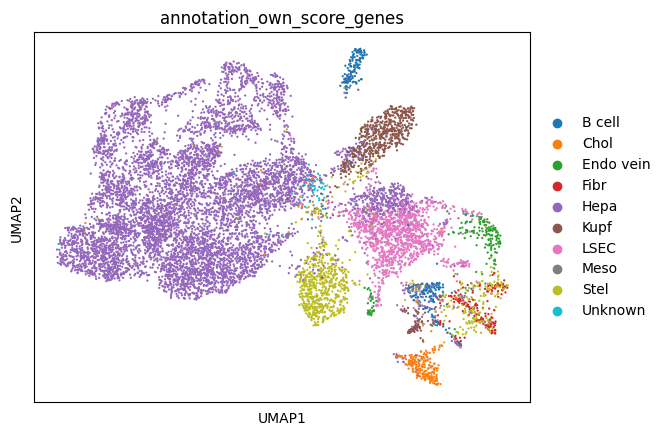

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
           annotation_own_score_genes
B cell                       2.582829
Chol                         2.155326
Endo vein                    1.585322
Fibr                         1.505166
Hepa                        66.129320
Kupf                         5.931600
LSEC                        11.417884
Meso                         0.409690
Stel                         7.766299
Unknown                      0.516566


In [5]:
own_score_genes(sdata,path_mg,scale_score='MinMax')
visualize_classification(sdata,'annotation_own_score_genes','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)

In [6]:
# Use scores that are not scaled for the clustering (and no min_score) or scores that are scaled
scores = own_score_genes(sdata,path_mg,min_score='None',scale_score='None') 
scores_minmax = own_score_genes(sdata,path_mg,min_score='None',scale_score='MinMax') 
scores


,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
0,5.724390,-2.948731,-0.428053,0.390216,-1.935285,-4.028191,-2.852406,-0.405329,-0.257376
1,-4.901335,-0.451450,-1.597536,-3.249090,28.073285,-5.371889,18.302675,-0.405329,15.658499
2,-4.974463,-2.948731,-1.597536,-2.578409,-2.136977,-4.573974,21.429431,-0.405329,21.444426
3,-3.148392,-2.948731,-1.597536,-1.702138,-3.777896,-4.423556,9.946627,-0.405329,6.683257
4,-2.232764,-2.948731,-1.597536,-0.314997,-3.777896,-2.657646,-2.672196,-0.405329,-0.257376
...,...,...,...,...,...,...,...,...,...
11223,-0.170817,-2.948731,-1.597536,-0.735539,-3.777896,-2.377381,-2.867433,-0.405329,-0.257376
11224,5.014245,-2.948731,-1.597536,0.188656,0.596784,-1.736590,-2.044225,-0.405329,-0.257376
11225,0.890555,-2.948731,-1.597536,-0.779333,0.445038,-4.932637,-3.756853,-0.405329,-0.257376
11226,-7.473840,-2.948731,-1.597536,-2.796157,1.558340,29.130346,18.413673,-0.405329,-0.257376


In [7]:
scores_minmax

,Hepa,LSEC,Endo vein,Chol,Kupf,Stel,Fibr,B cell,Meso
0,0.538750,0.000000,0.021096,0.085765,0.021767,0.033361,0.020318,0.0,0.000000
1,0.132747,0.055902,0.000000,0.000000,0.376261,0.010282,0.241621,0.0,0.526007
2,0.129953,0.000000,0.000000,0.015805,0.019384,0.023986,0.274330,0.0,0.717227
3,0.199726,0.000000,0.000000,0.036456,0.000000,0.026570,0.154209,0.0,0.229382
4,0.234711,0.000000,0.000000,0.069145,0.000000,0.056901,0.022204,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
11223,0.313497,0.000000,0.000000,0.059235,0.000000,0.061714,0.020161,0.0,0.000000
11224,0.511616,0.000000,0.000000,0.081015,0.051679,0.072720,0.028773,0.0,0.000000
11225,0.354052,0.000000,0.000000,0.058203,0.049886,0.017826,0.010857,0.0,0.000000
11226,0.034453,0.000000,0.000000,0.010674,0.063038,0.602880,0.242782,0.0,0.000000


<AxesSubplot: >

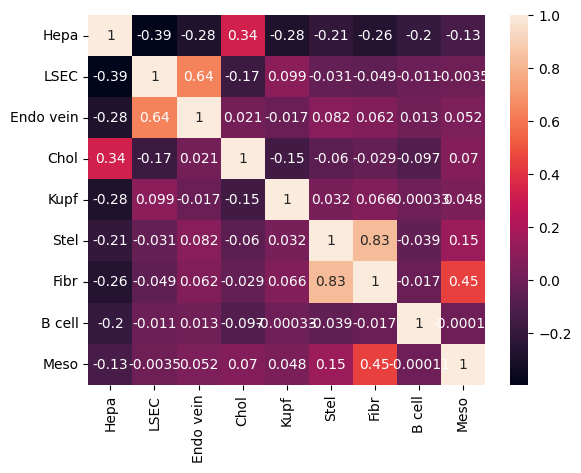

In [8]:
# plot correlation matrix
sns.heatmap(scores.corr(method='pearson'), annot=True)
# sns.heatmap(scores_minmax.corr(method='pearson'), annot=True) gives the same heatmap

In [9]:
KMeans_clustering(sdata,scores,N_clusters=12)
KMeans_clustering(sdata,scores_minmax,suffix_name='minmax',N_clusters=12)

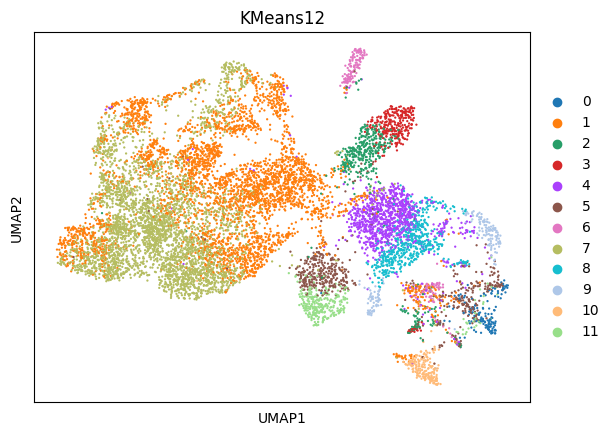

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
     KMeans12
0    1.327040
1   33.363021
2    4.007838
3    2.778767
4    9.164589
5    5.236908
6    1.905949
7   31.172070
8    4.818311
9    1.620948
10   1.879230
11   2.725330


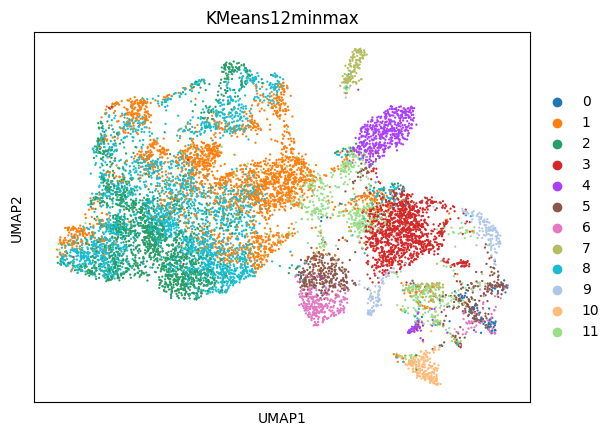

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
    KMeans12minmax
0         0.712504
1        22.978269
2        14.989312
3        10.607410
4         4.969719
5         4.943000
6         2.939081
7         1.914856
8        25.667973
9         1.799074
10        1.879230
11        6.599572


In [10]:
visualize_classification(sdata,'KMeans12','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)
visualize_classification(sdata,'KMeans12minmax','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)


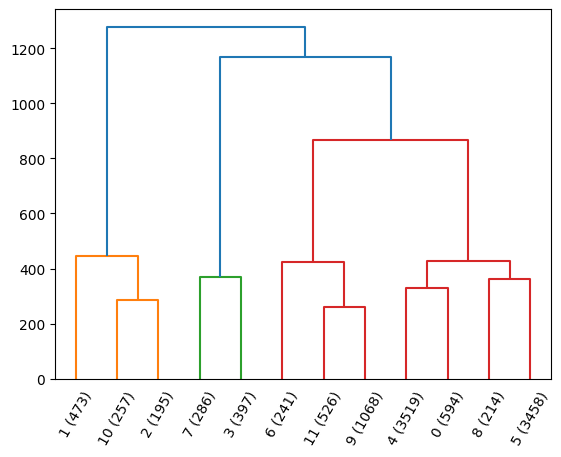

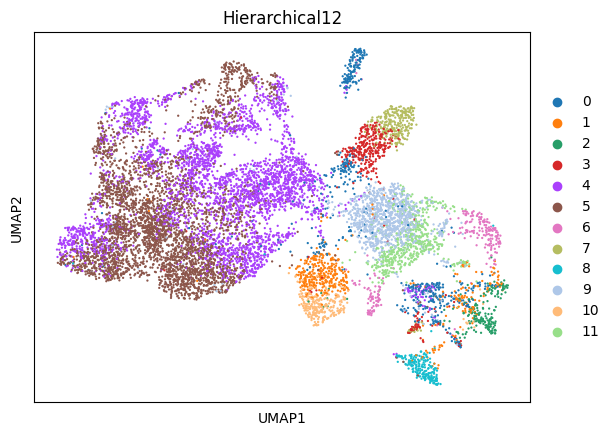

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
    Hierarchical12
0         5.290346
1         4.212683
2         1.736730
3         3.535803
4        31.341290
5        30.798005
6         2.146420
7         2.547203
8         1.905949
9         9.511934
10        2.288921
11        4.684717
categories: 0, 1, 2, etc.
var_group_labels: hepa, hepa_chol_stel_fibr, hepa, etc.


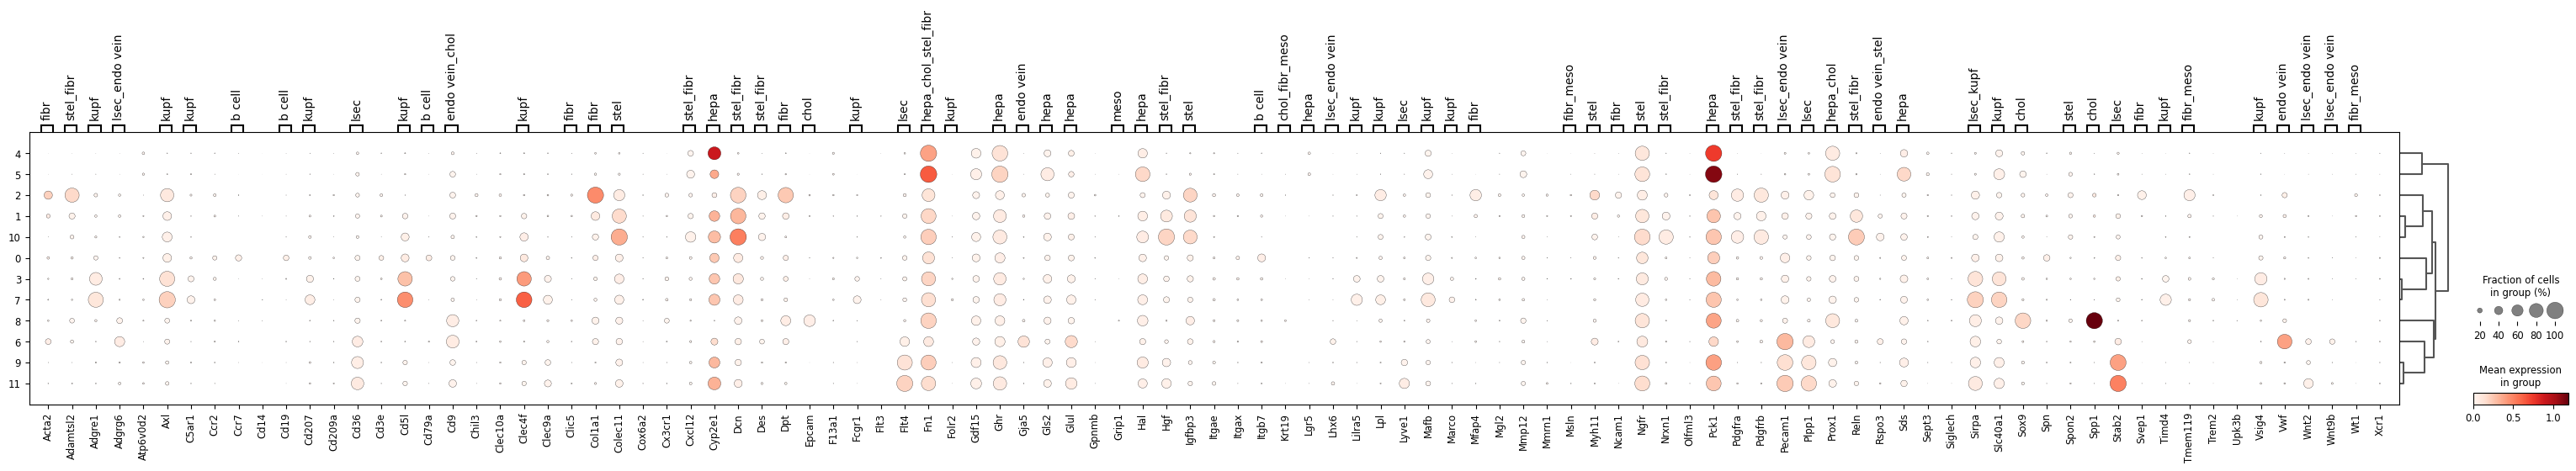

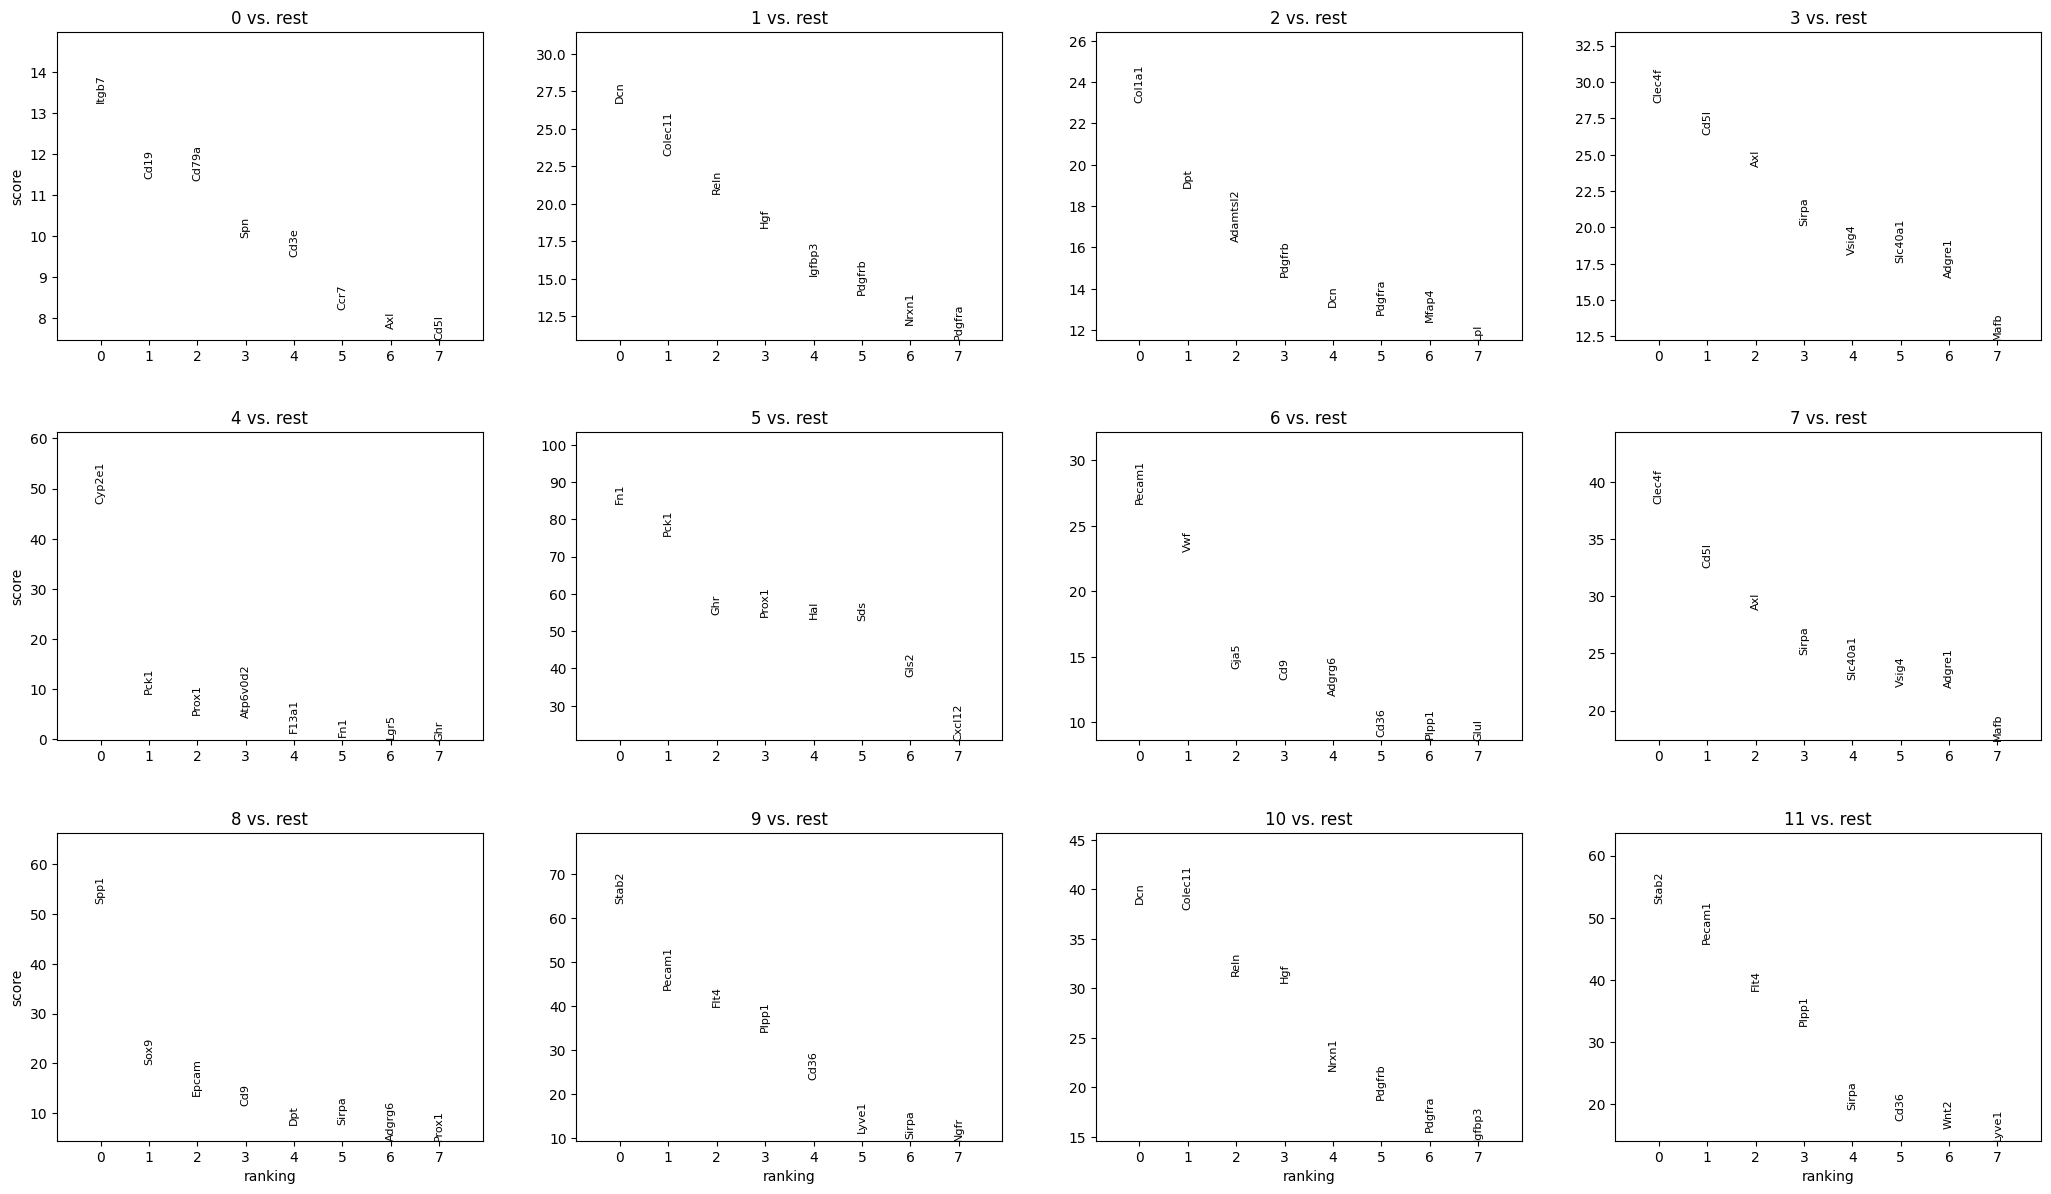

In [14]:
R = Hierarchical_clustering(sdata,scores,N_clusters=12)
visualize_classification(sdata,'Hierarchical12','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=True,plot_rank_genes_groups=True,plot_image=False)


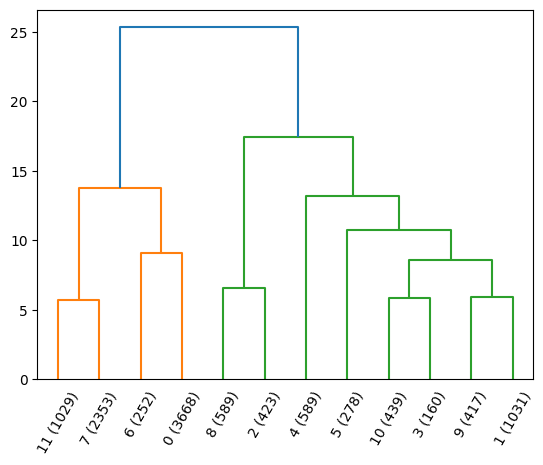

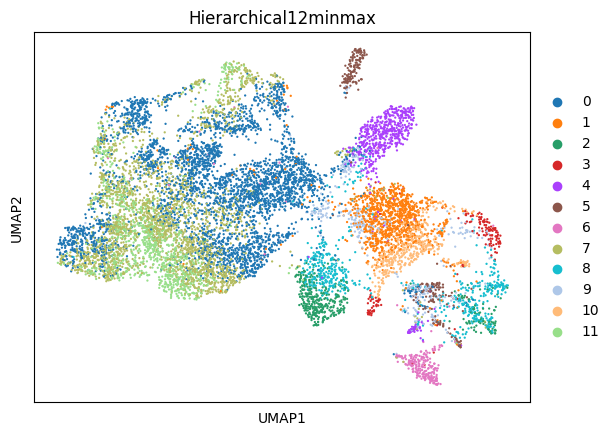

               atlas
B cell      0.621451
Chol        2.673310
Hepa       57.998500
Kupf        3.203686
LSEC        9.241401
Meso        2.796528
Endo vein   3.166185
Fibr        3.042966
Stel       13.768349
Unknown     3.487625
    Hierarchical12minmax
0              32.668329
1               9.182401
2               3.767367
3               1.425009
4               5.245814
5               2.475953
6               2.244389
7              20.956537
8               5.245814
9               3.713929
10              3.909868
11              9.164589


In [12]:
R = Hierarchical_clustering(sdata,scores_minmax,suffix_name='minmax',N_clusters=12)
visualize_classification(sdata,'Hierarchical12minmax','umap_23_15',"/home/wout/Documents/Thesis_lokaal/Mouse_Liver_Resolve_Data/markerGeneListBasic.csv",plot_dot_plot=False,plot_rank_genes_groups=False,plot_image=False)